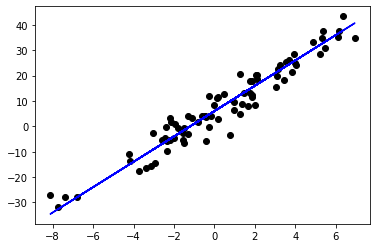

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random x
x = np.random.normal(0, 4, 80)

# Get y: add a standard deviation to get a more realistic data
y = 5 * (x + np.random.normal(0, 1, 80)) + 6 
y_real = 5 * x + 6

plt.scatter(x, y, color='black')
plt.plot(x, y_real, color='blue')
plt.show()

# Output Result

In [0]:
import torch
import torch.nn as nn

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
xp = torch.from_numpy(x).float()
yp = torch.from_numpy(y).float()

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.02 
epochs = 25

model = linearRegression(inputDim, outputDim)

#Objective function
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#Traning phase
losses = []
final_loss= 0
for epoch in range(epochs):
    
    # get output from the model, given the inputs
    y_pred = model(xp)

    # get loss for the predicted output
    loss = criterion(y_pred, yp)
    
    losses.append(loss.item())
    
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get gradients w.r.t to parameters
    loss.backward()
    
    final_loss = loss.item()

    # update parameters
    optimizer.step()

#Prediction
y_pred = model(xp)

